<a href="https://colab.research.google.com/github/lgsilva-dev/credito/blob/main/CreditoEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caderno de Limpeza e Exploração dos Dados

## Limpeza dos Dados

### Imports

In [1]:
!pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 10.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import resources, report

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/gocn/analisecredito_ajustado.csv')
df

,Empresa,EBITDA,Divida,Multiplicador do Setor,Margem EBITDA,Peso_margem_ebitda,nota_i1,nota_pi1,Divida liquida/EBTIDA,peso_Divida liquida/EBTIDA,nota_i2,nota_pi2,Indice de liquidez,peso_Indice de liquidez,nota_i3,nota_pi3,Ciclo Financeiro,peso_ciclo_financeiro,nota_i4,nota_pi4,Conversão de Ebitda em FCO,peso_conversao_ebitda_em_fco,nota_i5,nota_pi5,Tempo de atuação em anos,peso_tempo_atuacao,nota_i6,nota_pi6,Auditoria em Demonstrações Financeiras,peso_auditoria,nota_i7,nota_pi7,Pendencias Financeiras,peso_pendencias,nota_i8,nota_pi8,Possui Garantia,peso_garantia,nota_i9,nota_pi9,Possui Seguros,peso_seguros,nota_i10,nota_pi10,Serasa Score,peso_serasa_score,nota_i11,nota_pi11,SCORE GO ON,RATING GO ON,Crédito Concedido?,Valor Limite de Crédito
0,1,32405225,63411286,7.4,8.44,0.2,3,0.6,-0.94,0.1,5,0.5,1.94,0.1,4,0.4,101,0.1,2,0.2,31.81,0.1,2,0.2,4,0.05,2,0.10,Grant Thornton,0.1,3,0.3,Sem pendências,0.05,5,0.25,veículos,0.05,3,0.15,seguro patrimonial,0.05,3,0.15,900,0.1,5,0.5,3.35,3,Sim,176387376
1,2,3527758,9936724,7.4,3.70,0.2,2,0.4,2.23,0.1,3,0.3,0.62,0.1,1,0.1,99,0.1,2,0.2,-10.16,0.1,1,0.1,3,0.05,2,0.10,Não,0.1,1,0.1,Protesto e divida vencidas,0.05,1,0.05,não,0.05,1,0.05,não,0.05,1,0.05,50,0.1,1,0.1,1.55,1,Não,0
2,3,204665,455241,7.4,8.00,0.2,3,0.6,1.72,0.1,3,0.3,0.59,0.1,1,0.1,118,0.1,2,0.2,73.67,0.1,4,0.4,6,0.05,3,0.15,PwC,0.1,5,0.5,Pefin,0.05,1,0.05,veículos,0.05,3,0.15,não,0.05,1,0.05,200,0.1,1,0.1,2.60,3,Sim,1059279
3,4,4080707,12332276,7.4,3.35,0.2,2,0.4,2.19,0.1,3,0.3,0.51,0.1,1,0.1,51,0.1,3,0.3,81.34,0.1,4,0.4,2,0.05,1,0.05,KPMG,0.1,5,0.5,Protesto e ações judiciais,0.05,1,0.05,aval dos sócios,0.05,2,0.10,não,0.05,1,0.05,400,0.1,2,0.2,2.45,2,Não,0
4,5,686668,791410,7.4,8.61,0.2,3,0.6,-0.17,0.1,5,0.5,2.40,0.1,5,0.5,21,0.1,4,0.4,69.11,0.1,3,0.3,4,0.05,2,0.10,PwC,0.1,5,0.5,Sem pendências,0.05,5,0.25,aval dos sócios,0.05,2,0.10,seguro empresarial completo,0.05,5,0.25,550,0.1,3,0.3,3.80,4,Sim,4289930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,41302,125417,7.4,4.85,0.2,2,0.4,2.82,0.1,3,0.3,0.56,0.1,1,0.1,95,0.1,2,0.2,49.27,0.1,3,0.3,3,0.05,2,0.10,Não,0.1,1,0.1,Pefin,0.05,1,0.05,não,0.05,1,0.05,seguro de estoque,0.05,3,0.15,250,0.1,1,0.1,1.85,2,Não,0
49996,49997,2878842,1647390,7.4,11.85,0.2,4,0.8,0.02,0.1,4,0.4,1.31,0.1,3,0.3,-31,0.1,5,0.5,126.84,0.1,5,0.5,11,0.05,4,0.20,Ernst & Young,0.1,5,0.5,Sem pendências,0.05,5,0.25,aval dos sócios,0.05,2,0.10,não,0.05,1,0.05,750,0.1,4,0.4,4.00,4,Sim,19656040
49997,49998,3120037,2382130,7.4,13.15,0.2,4,0.8,0.34,0.1,4,0.4,1.20,0.1,3,0.3,-17,0.1,5,0.5,124.71,0.1,5,0.5,15,0.05,4,0.20,BDO,0.1,3,0.3,Sem pendências,0.05,5,0.25,imóvel,0.05,5,0.25,seguro patrimonial,0.05,3,0.15,850,0.1,5,0.5,4.15,4,Sim,20706143
49998,49999,53237,188491,7.4,5.77,0.2,3,0.6,2.72,0.1,3,0.3,0.87,0.1,2,0.2,148,0.1,1,0.1,-9.64,0.1,1,0.1,14,0.05,4,0.20,Não,0.1,1,0.1,Pefin e dívida vencida,0.05,1,0.05,veículos,0.05,3,0.15,não,0.05,1,0.05,250,0.1,1,0.1,1.95,2,Não,0


* Troca de Nomes em Colunas e Drop de colunas desnecessarias!

In [5]:
df = df.drop(columns=['Multiplicador do Setor','nota_pi1','nota_pi2','nota_pi3','nota_pi4','nota_pi5','nota_pi6','nota_pi7','nota_pi8','nota_pi9','nota_pi10' ,'nota_pi11', 'Peso_margem_ebitda','peso_Divida liquida/EBTIDA', 'peso_Indice de liquidez', 'peso_ciclo_financeiro', 'peso_conversao_ebitda_em_fco', 'peso_tempo_atuacao', 'peso_auditoria', 'peso_pendencias','peso_garantia','peso_seguros','peso_serasa_score' ])

In [6]:
df = df.rename(columns={"Crédito Concedido?": "Target", "Valor Limite de Crédito": "Limite de Credito", "Possui Seguros":"Seguros", "Possui Garantia":"Garantia", "Conversão de Ebitda em FCO":"Conversao Ebitda em FCO", 'Pendencias Financeiras':'PEFIN', 'Auditoria em Demonstrações Financeiras': 'Auditorias'})

In [7]:
df['Target'].unique()

array(['Sim', 'Não'], dtype=object)

In [8]:
df['Target'] = df['Target'].replace({'Sim': 1, 'Não': 0})


<ipython-input-8-813b6108fabc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace({'Sim': 1, 'Não': 0})


In [9]:
df['Target'] = df['Target'].astype(int)

* Quantidade de Concessões de Crédito e Porcentagem.

In [10]:
counts = df['Target'].value_counts()
percentages = df['Target'].value_counts(normalize=True) * 100
print(f"Total Aprovado: {counts.get(1, 0)} ocorrências ({percentages.get(1, 0):.2f}%)")
print(f"Total Reprovado: {counts.get(0, 0)} ocorrências ({percentages.get(0, 0):.2f}%)")

Total Aprovado: 33524 ocorrências (67.05%)
Total Reprovado: 16476 ocorrências (32.95%)


* Categorização das colunas String

In [11]:
df['PEFIN'].unique()

array(['Sem pendências', 'Protesto e divida vencidas', 'Pefin',
       'Protesto e ações judiciais', 'Protesto', 'Dívida vencida',
       'Ações judiciais', 'Pefin e dívida vencida'], dtype=object)

In [12]:
df['Auditorias'].unique()

array(['Grant Thornton', 'Não', 'PwC', 'KPMG', 'Ernst & Young',
       'Deloitte', 'BDO'], dtype=object)

In [13]:
df['Garantia'].unique()

array(['veículos', 'não', 'aval dos sócios', 'recebíveis',
       'máquinas e equipamentos', 'imóvel'], dtype=object)

In [14]:
df['Seguros'].unique()

array(['seguro patrimonial', 'não', 'seguro empresarial completo',
       'seguro de responsabilidade civil', 'seguro de estoque'],
      dtype=object)

In [15]:
df['PEFIN'] = df['PEFIN'].replace({'Sem pendências': 0, 'Protesto e divida vencidas': 1,'Pefin': 2,'Protesto e ações judiciais': 3, 'Protesto': 4, 'Dívida vencida': 5, 'Ações judiciais': 6, 'Pefin e dívida vencida': 7})
df['PEFIN'] = df['PEFIN'].astype(int)
df['Auditorias'] = df['Auditorias'].replace({'Não': 0, 'Grant Thornton': 1, 'PwC': 2,'KPMG': 3, 'Ernst & Young': 4, 'Deloitte': 5, 'BDO': 6})
df['Auditorias'] = df['Auditorias'].astype(int)
df['Garantia'] = df['Garantia'].replace({'não': 0, 'veículos': 1, 'aval dos sócios': 2,'recebíveis': 3, 'máquinas e equipamentos': 4, 'imóvel': 5})
df['Garantia'] = df['Garantia'].astype(int)
df['Seguros'] = df['Seguros'].replace({'não': 0, 'veículos': 1, 'seguro patrimonial': 2, 'seguro empresarial completo': 3, 'seguro de responsabilidade civil': 4, 'seguro de estoque': 5})
df['Seguros'] = df['Seguros'].astype(int)
df['Divida'] = df['Divida'].astype(float)
df['EBITDA'] = df['EBITDA'].astype(float)

<ipython-input-15-07399ff6010e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PEFIN'] = df['PEFIN'].replace({'Sem pendências': 0, 'Protesto e divida vencidas': 1,'Pefin': 2,'Protesto e ações judiciais': 3, 'Protesto': 4, 'Dívida vencida': 5, 'Ações judiciais': 6, 'Pefin e dívida vencida': 7})
<ipython-input-15-07399ff6010e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Auditorias'] = df['Auditorias'].replace({'Não': 0, 'Grant Thornton': 1, 'PwC': 2,'KPMG': 3, 'Ernst & Young': 4, 'Deloitte': 5, 'BDO': 6})
<ipython-inp

In [16]:
df.head()

,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
0,1,32405225.0,63411286.0,8.44,3,-0.94,5,1.94,4,101,2,31.81,2,4,2,1,3,0,5,1,3,2,3,900,5,3.35,3,1,176387376
1,2,3527758.0,9936724.0,3.70,2,2.23,3,0.62,1,99,2,-10.16,1,3,2,0,1,1,1,0,1,0,1,50,1,1.55,1,0,0
2,3,204665.0,455241.0,8.00,3,1.72,3,0.59,1,118,2,73.67,4,6,3,2,5,2,1,1,3,0,1,200,1,2.60,3,1,1059279
3,4,4080707.0,12332276.0,3.35,2,2.19,3,0.51,1,51,3,81.34,4,2,1,3,5,3,1,2,2,0,1,400,2,2.45,2,0,0
4,5,686668.0,791410.0,8.61,3,-0.17,5,2.40,5,21,4,69.11,3,4,2,2,5,0,5,2,2,3,5,550,3,3.80,4,1,4289930


In [17]:
#df_clean = df.copy()

In [18]:
#df_clean.to_csv('/content/drive/MyDrive/gocn/df_clean.csv', index=False)

## Exploração dos Dados

### Correlações

#### Pearson

* Correlação de Pearson

In [19]:
correlations = df.corr()
correlations

,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
Empresa,1.000000,-0.001880,-0.004745,-0.005370,-0.006498,-0.000933,-0.000892,-0.001597,-0.000144,-0.002255,0.002192,0.006132,0.005785,0.004724,0.001469,0.003074,0.002201,0.001496,-0.000411,-0.000243,0.001720,-0.003722,-0.000450,0.000054,0.000183,-0.000289,0.001034,0.001146,-0.000767
EBITDA,-0.001880,1.000000,0.930118,0.076036,0.081136,-0.092274,0.082515,0.078477,0.086329,-0.067984,0.065607,0.062695,0.064362,0.034876,0.048481,0.056889,0.074431,-0.050848,0.061796,0.037252,0.038620,0.049688,0.053499,0.076822,0.072918,0.094305,0.090449,0.095763,0.989063
Divida,-0.004745,0.930118,1.000000,0.055494,0.059860,-0.063982,0.055737,0.058208,0.064455,-0.050093,0.047986,0.045756,0.047112,0.028503,0.036008,0.040605,0.054830,-0.035512,0.043096,0.025333,0.025421,0.035240,0.037944,0.056282,0.053511,0.068543,0.065649,0.069511,0.875465
Margem EBITDA,-0.005370,0.076036,0.055494,1.000000,0.903500,-0.733482,0.664163,0.634251,0.687302,-0.507238,0.492773,0.510566,0.512437,0.281964,0.406932,0.408771,0.586638,-0.391047,0.494124,0.317094,0.334533,0.362360,0.431821,0.631282,0.610817,0.823632,0.804529,0.768347,0.087830
nota_i1,-0.006498,0.081136,0.059860,0.903500,1.000000,-0.783354,0.709172,0.679122,0.735441,-0.542951,0.526553,0.545035,0.547543,0.300625,0.434391,0.436967,0.626102,-0.419890,0.529614,0.336587,0.356358,0.385325,0.459195,0.671088,0.649218,0.888718,0.866138,0.833663,0.093446
Divida liquida/EBTIDA,-0.000933,-0.092274,-0.063982,-0.733482,-0.783354,1.000000,-0.940933,-0.734180,-0.795981,0.588523,-0.570938,-0.590967,-0.593784,-0.323780,-0.466329,-0.473130,-0.678034,0.454789,-0.577798,-0.366820,-0.387119,-0.418822,-0.501682,-0.726745,-0.702486,-0.898459,-0.871052,-0.882948,-0.106342
nota_i2,-0.000892,0.082515,0.055737,0.664163,0.709172,-0.940933,1.000000,0.665260,0.721273,-0.534963,0.518680,0.536047,0.538335,0.293813,0.422114,0.428349,0.614800,-0.412088,0.524716,0.332206,0.350229,0.378730,0.455626,0.659374,0.637506,0.827747,0.804118,0.802158,0.095651
Indice de liquidez,-0.001597,0.078477,0.058208,0.634251,0.679122,-0.734180,0.665260,1.000000,0.968288,-0.509417,0.494067,0.515825,0.517878,0.281044,0.403670,0.405137,0.585245,-0.392485,0.499702,0.313536,0.331102,0.358972,0.435282,0.629010,0.607991,0.803501,0.784184,0.764602,0.090299
nota_i3,-0.000144,0.086329,0.064455,0.687302,0.735441,-0.795981,0.721273,0.968288,1.000000,-0.552424,0.536103,0.558557,0.560742,0.305625,0.439107,0.439072,0.634584,-0.425649,0.542059,0.340356,0.360201,0.389242,0.470976,0.681472,0.658426,0.863968,0.841274,0.829936,0.098985
Ciclo Financeiro,-0.002255,-0.067984,-0.050093,-0.507238,-0.542951,0.588523,-0.534963,-0.509417,-0.552424,1.000000,-0.950047,-0.412424,-0.412816,-0.225939,-0.326002,-0.326046,-0.470558,0.313550,-0.401063,-0.253102,-0.268094,-0.289098,-0.348558,-0.503818,-0.485666,-0.681497,-0.667940,-0.629300,-0.078040


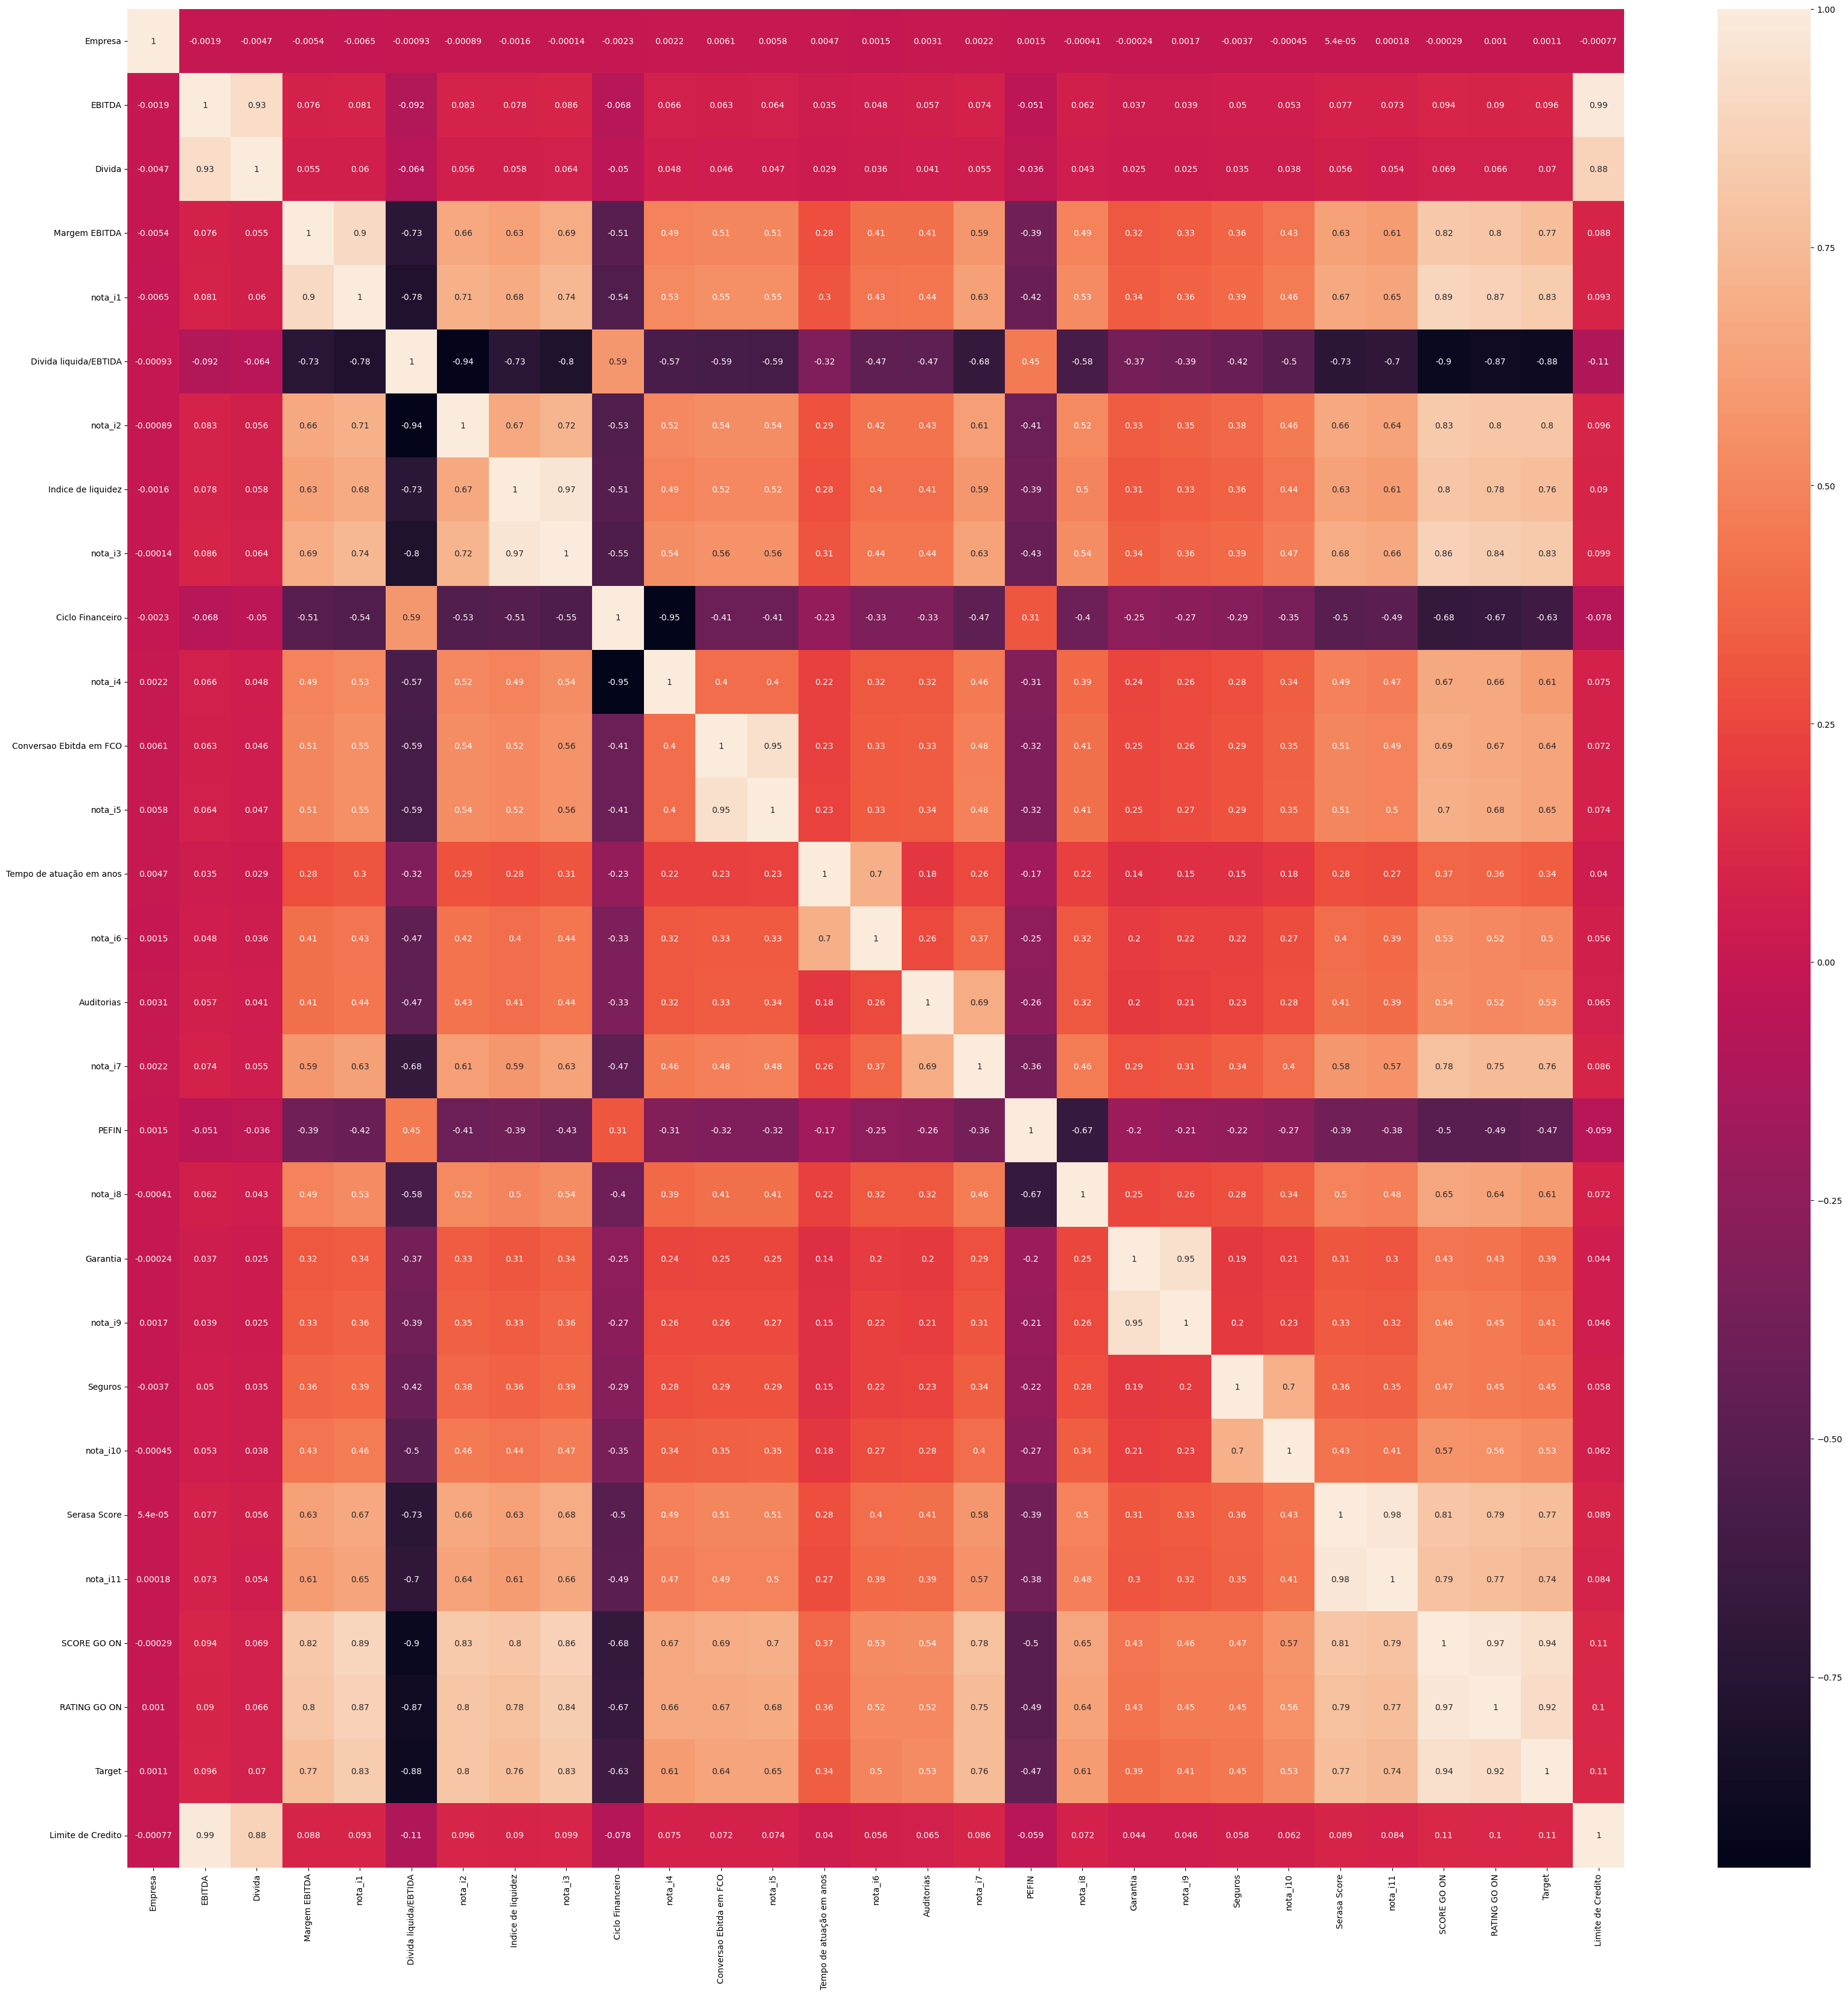

In [20]:
f, ax = plt.subplots(figsize=(40,40)), sns.heatmap(correlations, annot = True);

* Lista das maiores Corrrelações de Pearson

In [21]:
correlacoes = df.corr(numeric_only=True)['Target'].drop('Target').sort_values(ascending=False)
correlacoes

,Target
SCORE GO ON,0.943083
RATING GO ON,0.922541
nota_i1,0.833663
nota_i3,0.829936
nota_i2,0.802158
Margem EBITDA,0.768347
Serasa Score,0.767677
Indice de liquidez,0.764602
nota_i7,0.755718
nota_i11,0.741960


In [22]:
correlacoes = df.corr(numeric_only=True)['Target'].drop('Target').abs().sort_values(ascending=False)
top_features = correlacoes.head(5).index  # Pegando as 5 mais correlacionadas

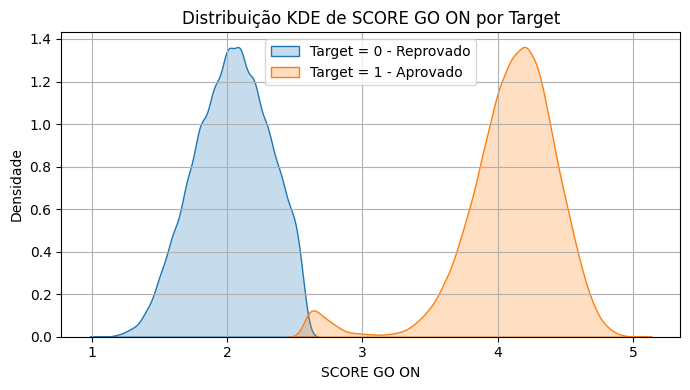

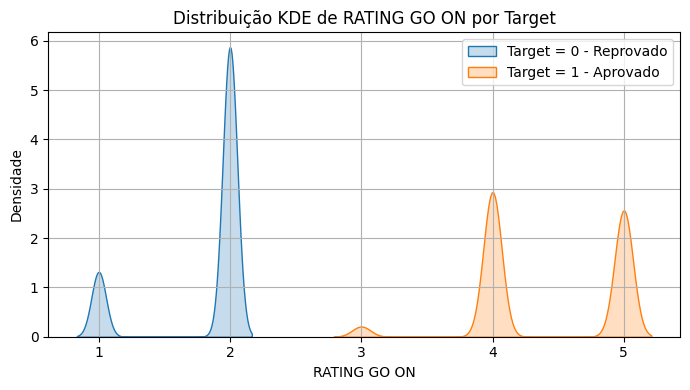

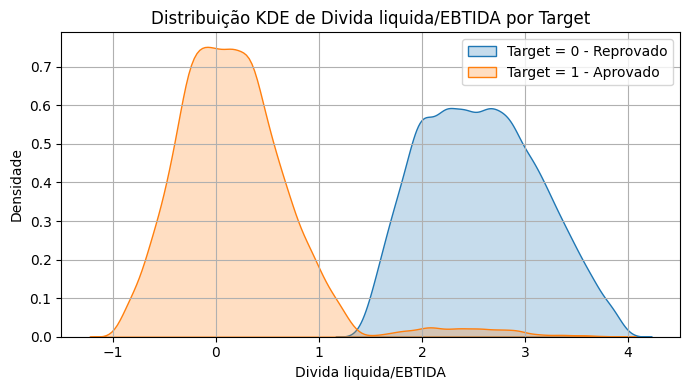

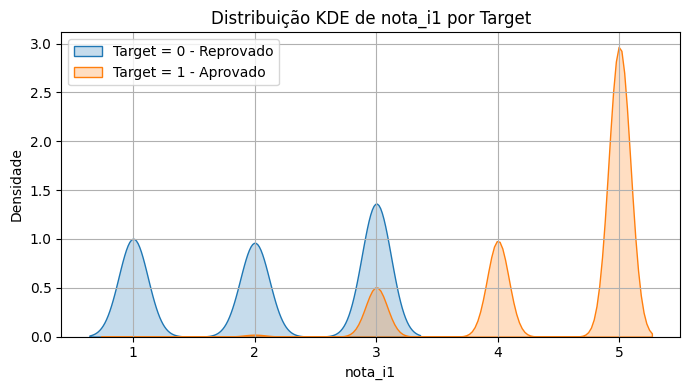

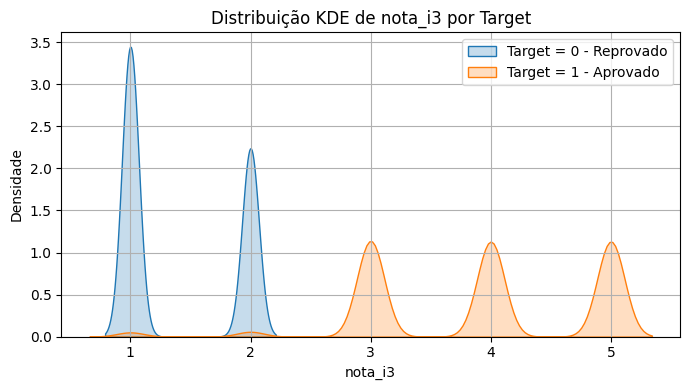

In [23]:
for feature in top_features:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df[df['Target'] == 0], x=feature, fill=True, label='Target = 0 - Reprovado', common_norm=False)
    sns.kdeplot(data=df[df['Target'] == 1], x=feature, fill=True, label='Target = 1 - Aprovado', common_norm=False)
    plt.title(f'Distribuição KDE de {feature} por Target')
    plt.xlabel(feature)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Phi-K

* Correlação de Phi-K
(Muito boa para correlacionar numeros com categorias e medir a dependencia dos valores.)

In [24]:
# get the phi_k correlation matrix between all variables
phik = df.phik_matrix()
phik

interval columns not set, guessing: ['Empresa', 'EBITDA', 'Divida', 'Margem EBITDA', 'nota_i1', 'Divida liquida/EBTIDA', 'nota_i2', 'Indice de liquidez', 'nota_i3', 'Ciclo Financeiro', 'nota_i4', 'Conversao Ebitda em FCO', 'nota_i5', 'Tempo de atuação em anos', 'nota_i6', 'Auditorias', 'nota_i7', 'PEFIN', 'nota_i8', 'Garantia', 'nota_i9', 'Seguros', 'nota_i10', 'Serasa Score', 'nota_i11', 'SCORE GO ON', 'RATING GO ON', 'Target', 'Limite de Credito']


,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
Empresa,1.000000,0.005907,0.000000,0.000000,0.010568,0.022774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009998,0.019703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003724,0.015105,0.008782,0.012194,0.012968,0.000000,0.000000
EBITDA,0.005907,1.000000,0.814221,0.027874,0.021429,0.023893,0.023539,0.027752,0.028821,0.018206,0.011041,0.000000,0.018343,0.043505,0.011289,0.030749,0.025944,0.000000,0.009052,0.010096,0.012029,0.016421,0.018494,0.023810,0.023034,0.035104,0.028587,0.031835,0.951158
Divida,0.000000,0.814221,1.000000,0.023738,0.020093,0.025575,0.016520,0.024072,0.028350,0.044065,0.012726,0.000000,0.010259,0.061917,0.008252,0.016204,0.024543,0.000000,0.000000,0.013988,0.011614,0.017007,0.016849,0.015038,0.018972,0.019318,0.020776,0.026904,0.917174
Margem EBITDA,0.000000,0.027874,0.023738,1.000000,0.983587,0.739133,0.713148,0.715424,0.810956,0.566596,0.617239,0.569033,0.628820,0.178177,0.517020,0.502103,0.641038,0.449733,0.535345,0.332028,0.450189,0.557174,0.476988,0.660677,0.717672,0.796894,0.856558,0.987905,0.027084
nota_i1,0.010568,0.021429,0.020093,0.983587,1.000000,0.793366,0.570454,0.767781,0.823483,0.607991,0.647495,0.610040,0.658485,0.186872,0.548887,0.480028,0.530600,0.451556,0.400089,0.281200,0.476636,0.586611,0.350132,0.708382,0.740848,0.870047,0.874623,0.739868,0.023197
Divida liquida/EBTIDA,0.022774,0.023893,0.025575,0.739133,0.793366,1.000000,0.999908,0.740325,0.836430,0.591700,0.644330,0.595079,0.657067,0.185792,0.543428,0.526821,0.668185,0.473141,0.562585,0.350008,0.472764,0.583726,0.502344,0.686254,0.745309,0.774272,0.841008,0.997133,0.021901
nota_i2,0.000000,0.023539,0.016520,0.713148,0.570454,0.999908,1.000000,0.713953,0.622399,0.550257,0.422109,0.552605,0.432980,0.161790,0.338800,0.545173,0.498372,0.686262,0.716851,0.357644,0.286793,0.370224,0.657617,0.651789,0.517303,0.753780,0.628468,0.990561,0.028150
Indice de liquidez,0.000000,0.027752,0.024072,0.715424,0.767781,0.740325,0.713953,1.000000,0.992315,0.568071,0.618457,0.571165,0.630877,0.173156,0.517501,0.502076,0.640920,0.450989,0.536841,0.330589,0.448403,0.558001,0.477745,0.660979,0.718759,0.758173,0.822885,0.987061,0.026615
nota_i3,0.000000,0.028821,0.028350,0.810956,0.823483,0.836430,0.622399,0.992315,1.000000,0.652930,0.691031,0.656266,0.702714,0.207958,0.592099,0.522667,0.574057,0.492558,0.440900,0.310778,0.519865,0.632376,0.387178,0.754559,0.782398,0.855919,0.868318,0.833245,0.032201
Ciclo Financeiro,0.000000,0.018206,0.044065,0.566596,0.607991,0.591700,0.550257,0.568071,0.652930,1.000000,0.973098,0.430639,0.477104,0.122149,0.383011,0.370422,0.493747,0.329402,0.392820,0.235966,0.325766,0.414022,0.345073,0.513720,0.558038,0.635464,0.687728,0.814576,0.014477


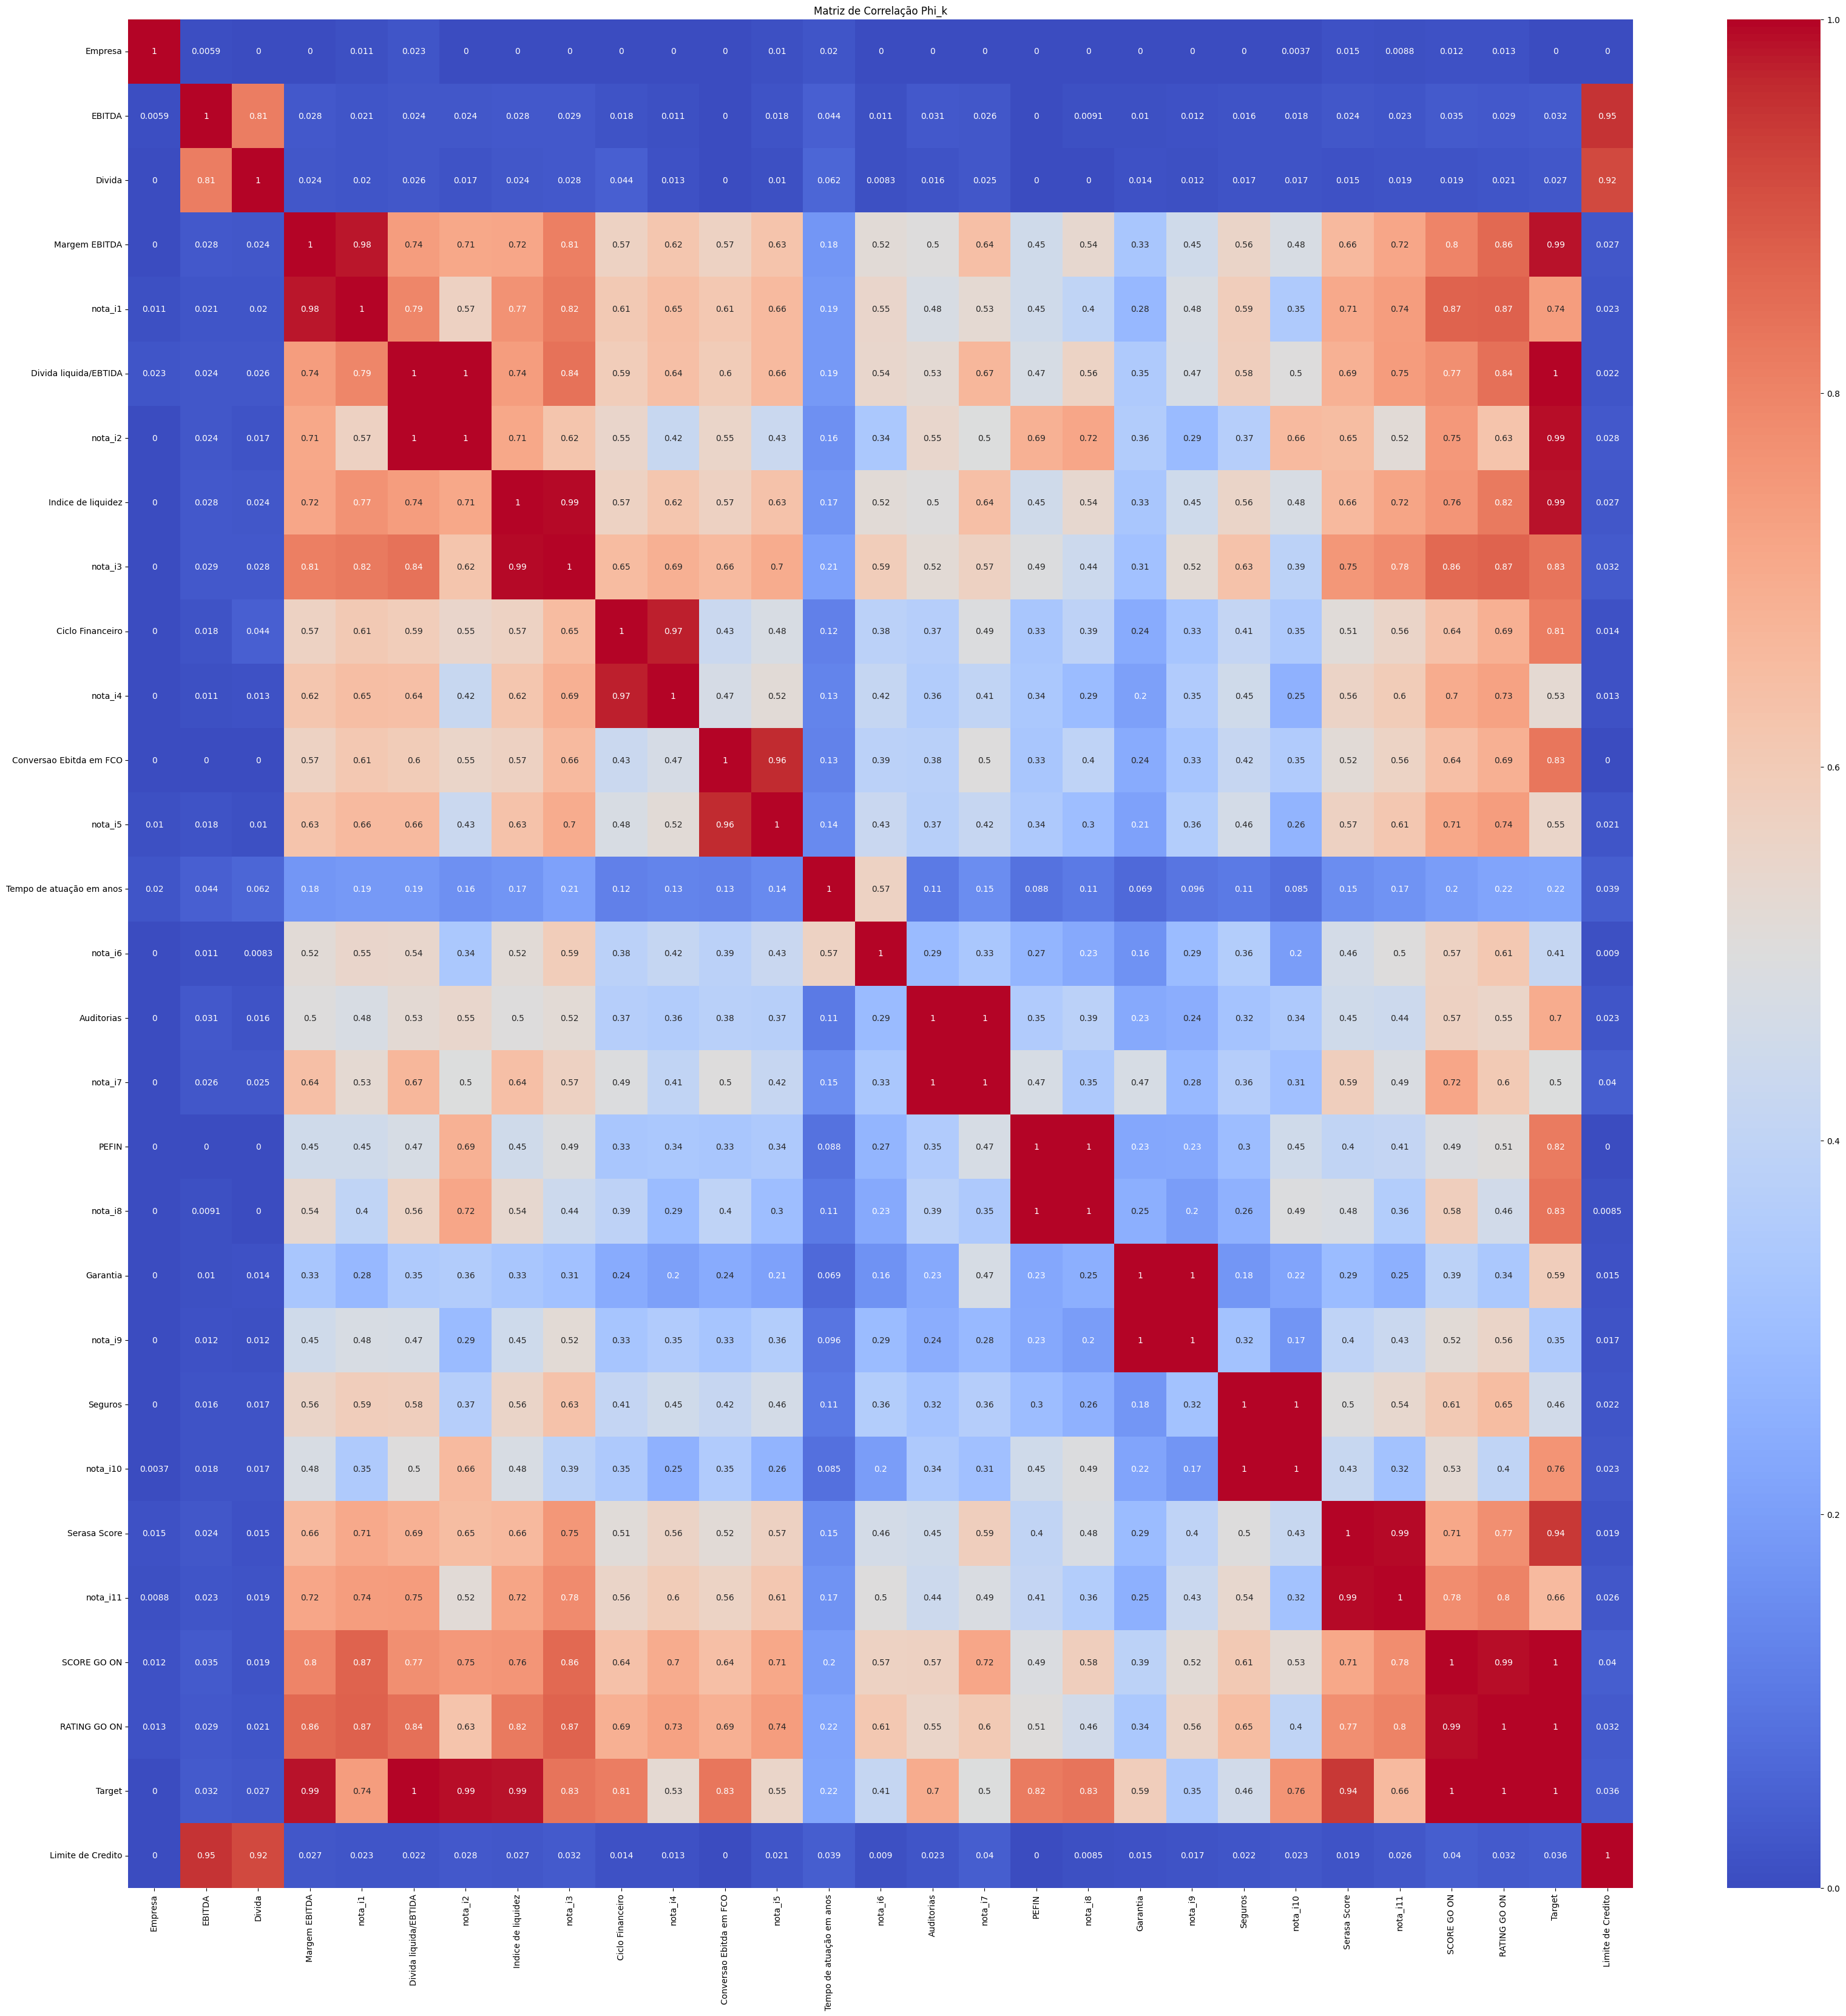

In [25]:
plt.figure(figsize=(40, 40))
sns.heatmap(phik, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matriz de Correlação Phi_k")
plt.show()

* Matriz de Significancia

In [26]:
# get the significance matrix (expressed as one-sided Z)
# of the hypothesis test of each variable-pair dependency
df.significance_matrix()

interval columns not set, guessing: ['Empresa', 'EBITDA', 'Divida', 'Margem EBITDA', 'nota_i1', 'Divida liquida/EBTIDA', 'nota_i2', 'Indice de liquidez', 'nota_i3', 'Ciclo Financeiro', 'nota_i4', 'Conversao Ebitda em FCO', 'nota_i5', 'Tempo de atuação em anos', 'nota_i6', 'Auditorias', 'nota_i7', 'PEFIN', 'nota_i8', 'Garantia', 'nota_i9', 'Seguros', 'nota_i10', 'Serasa Score', 'nota_i11', 'SCORE GO ON', 'RATING GO ON', 'Target', 'Limite de Credito']


,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
Empresa,479.082766,0.545966,0.317637,-0.667437,0.541574,1.614894,-0.511697,-0.691036,-0.778888,-1.489224,-1.946593,-0.834938,0.526092,1.368729,-1.234663,-1.746340,-1.933474,-1.200662,-2.262767,-0.907318,-0.274434,-0.274924,0.122369,0.699608,0.345228,0.629858,0.702265,-0.216520,0.452237
EBITDA,0.545966,48.907225,38.692488,4.899459,5.221462,5.468564,5.861448,5.845627,7.529666,2.238313,2.430466,2.812189,4.163380,1.336827,2.104415,4.642061,5.425108,1.151690,1.588997,1.162588,1.631721,2.922692,3.248560,4.882998,5.566528,7.279163,7.628998,8.410194,44.158882
Divida,0.317637,38.692488,49.544151,4.345454,4.536115,4.414329,2.945884,4.067455,5.606610,1.451584,2.045604,1.233486,1.622464,1.446093,1.403557,2.725012,2.787353,-0.260546,-0.750150,1.472888,1.374458,2.442036,2.488043,2.717211,3.529903,4.426454,4.897372,5.801830,35.625625
Margem EBITDA,-0.667437,4.899459,4.345454,476.441442,342.556375,236.418460,223.218368,222.962809,238.178540,144.272771,142.839902,144.177191,145.607388,40.241907,109.818710,160.777985,160.875385,146.107681,144.160863,91.248053,91.480950,119.469720,119.669463,187.612278,184.293599,256.380907,251.678840,224.604802,5.916389
nota_i1,0.541574,5.221462,4.536115,342.556375,377.669902,227.041504,213.214907,213.740481,228.342985,139.408507,137.383207,140.084369,140.972094,38.489921,106.261520,155.859690,155.718751,139.824850,137.567631,87.829674,87.919666,115.291761,115.374587,180.379972,176.774081,251.938694,246.192995,218.869827,5.517641
Divida liquida/EBTIDA,1.614894,5.468564,4.414329,236.418460,227.041504,453.201737,355.427028,236.807585,252.594073,153.268103,151.867145,153.074184,154.483065,43.380177,116.920210,170.177226,170.230457,155.882686,153.916876,97.008504,97.229071,126.952695,127.105045,199.356229,195.937811,254.481672,252.652339,234.607565,6.352337
nota_i2,-0.511697,5.861448,2.945884,223.218368,213.214907,355.427028,358.344237,223.054622,238.328296,147.024052,145.115243,147.633335,148.768005,41.443718,111.992055,164.338720,164.106159,148.259538,145.910061,93.093600,93.173390,121.972642,122.037566,189.302641,185.821681,240.913493,238.796949,224.899376,6.702829
Indice de liquidez,-0.691036,5.845627,4.067455,222.962809,213.740481,236.807585,223.054622,476.940532,367.653555,144.684368,143.184327,144.946212,146.355865,39.061132,109.813614,161.020384,161.042609,146.485689,144.578120,90.917104,91.154266,119.798861,119.996222,187.785757,184.707783,243.070475,240.846002,223.009096,6.080665
nota_i3,-0.778888,7.529666,5.606610,238.178540,228.342985,252.594073,238.328296,367.653555,399.447916,154.760284,152.926492,154.562488,155.555883,44.670656,117.845741,171.442582,171.185115,157.129547,154.869054,98.141555,98.233202,127.884006,127.962925,200.902495,197.142906,259.072007,256.296033,235.803604,8.205123
Ciclo Financeiro,-1.489224,2.238313,1.451584,144.272771,139.408507,153.268103,147.024052,144.684368,154.760284,411.685762,330.246920,97.580994,98.604606,25.845553,75.865329,109.307576,109.879561,98.456469,97.412172,62.281536,62.552597,82.067520,82.314720,124.283876,122.505202,168.712099,165.903660,152.491474,2.498630


* Lista das maiores Corrrelações de Phi-K

In [27]:
phik_corrs = phik.loc['Target'].drop('Target').sort_values(ascending=False)
phik_corrs

,Target
RATING GO ON,1.000000
SCORE GO ON,0.999513
Divida liquida/EBTIDA,0.997133
nota_i2,0.990561
Margem EBITDA,0.987905
Indice de liquidez,0.987061
Serasa Score,0.944829
nota_i3,0.833245
nota_i8,0.832287
Conversao Ebitda em FCO,0.830690


In [28]:
#phik_corrs = phik.loc['Target'].drop('Target').sort_values(ascending=False)
top_featurespk = phik_corrs.head(5).index

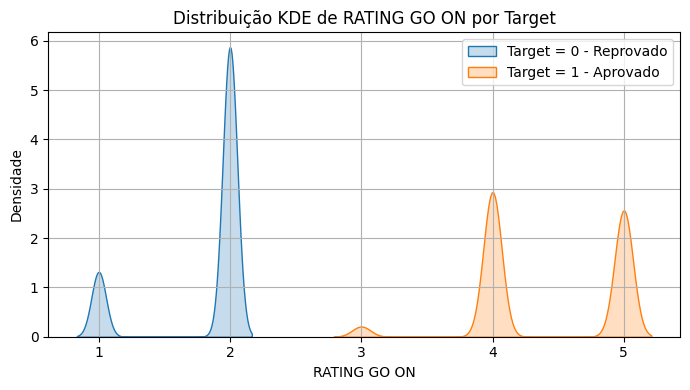

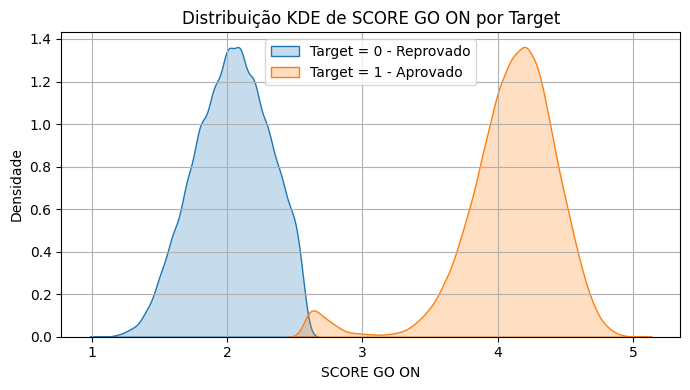

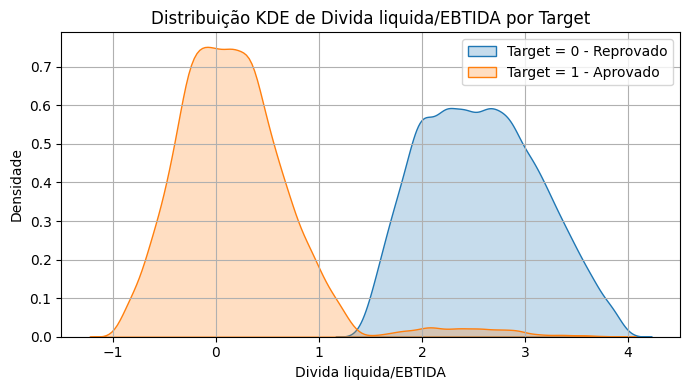

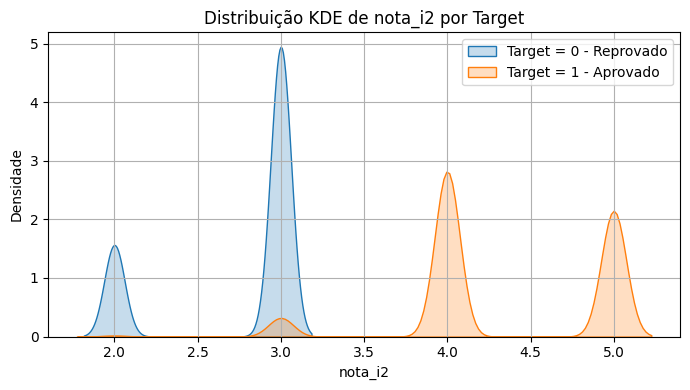

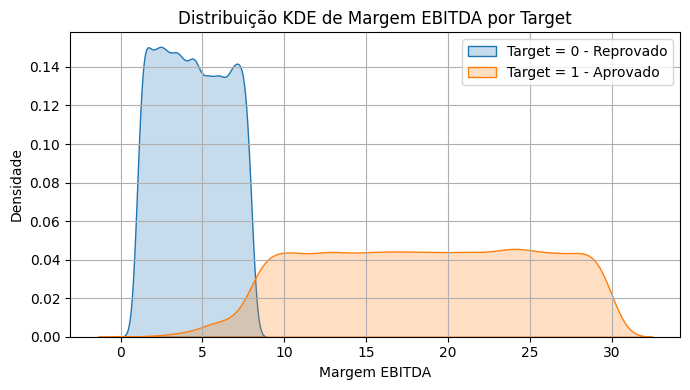

In [29]:
for feature in top_featurespk:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df[df['Target'] == 0], x=feature, fill=True, label='Target = 0 - Reprovado', common_norm=False)
    sns.kdeplot(data=df[df['Target'] == 1], x=feature, fill=True, label='Target = 1 - Aprovado', common_norm=False)
    plt.title(f'Distribuição KDE de {feature} por Target')
    plt.xlabel(feature)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Distribuições

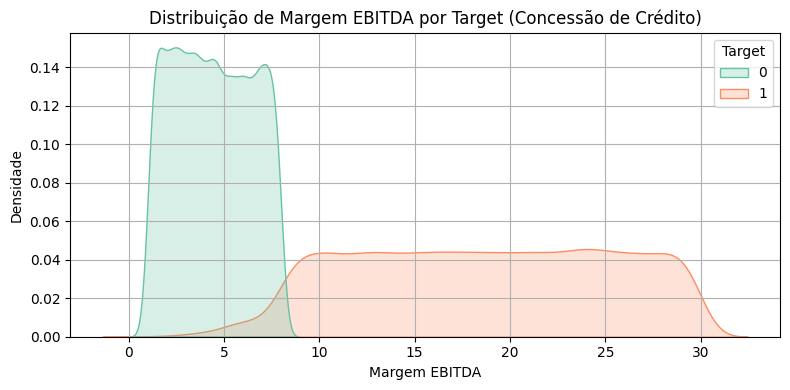

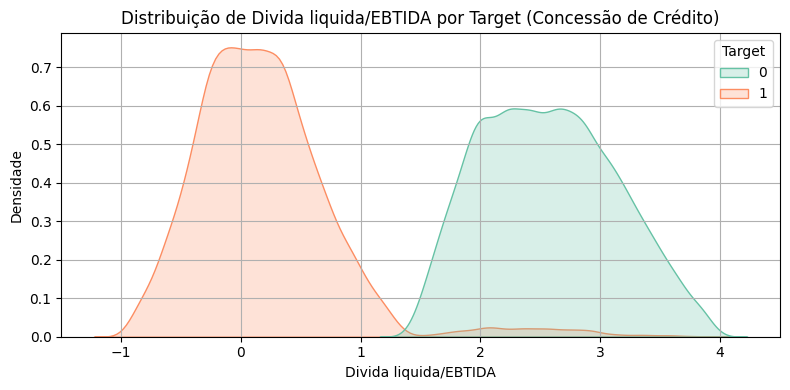

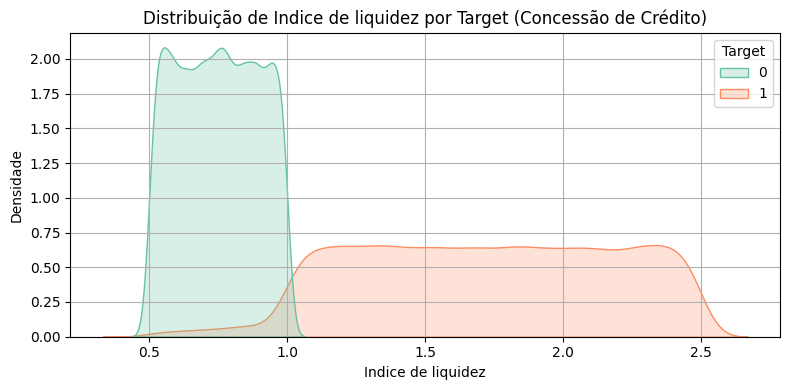

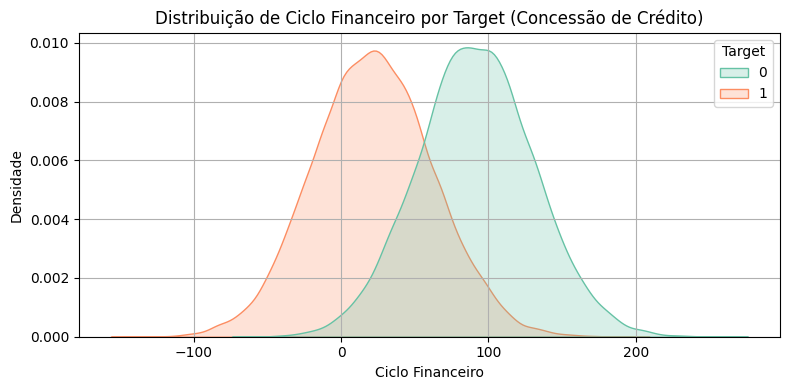

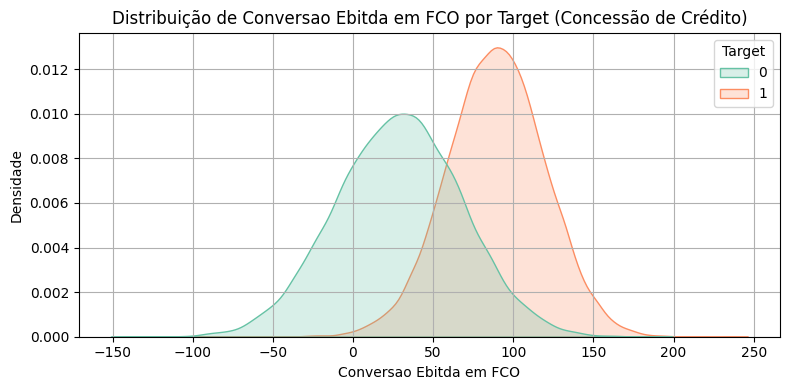

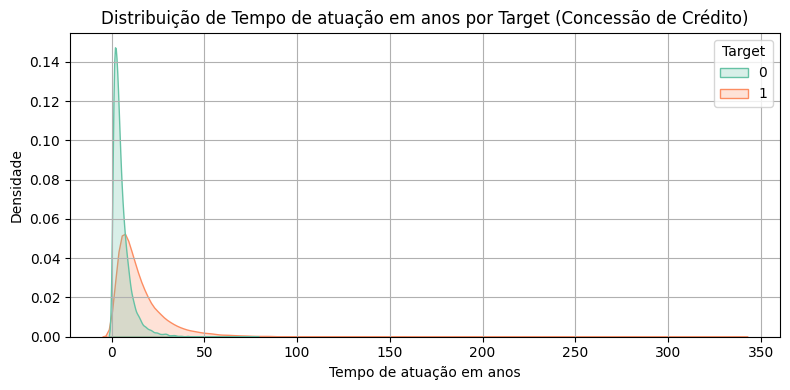

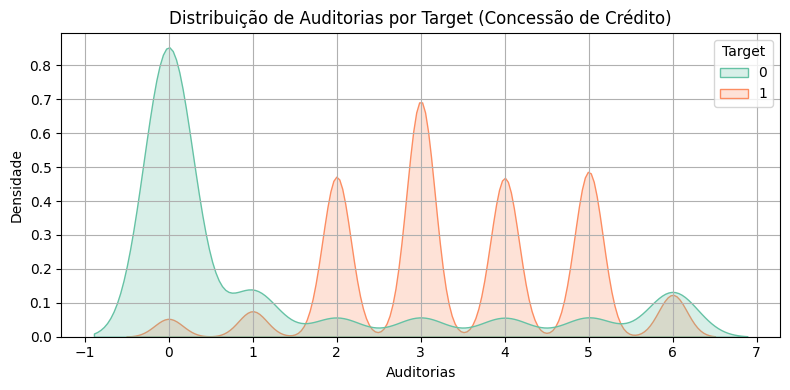

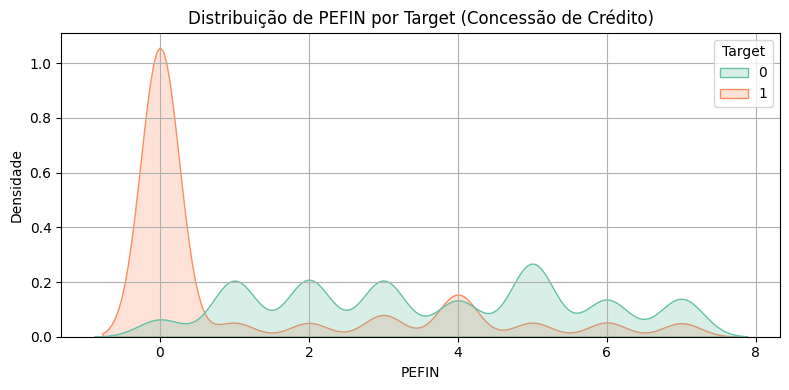

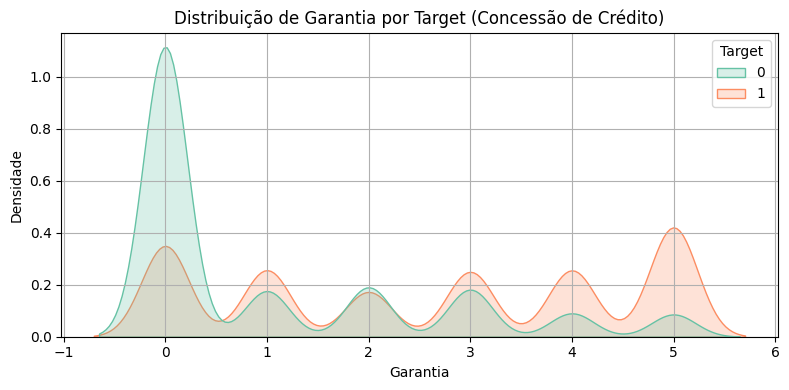

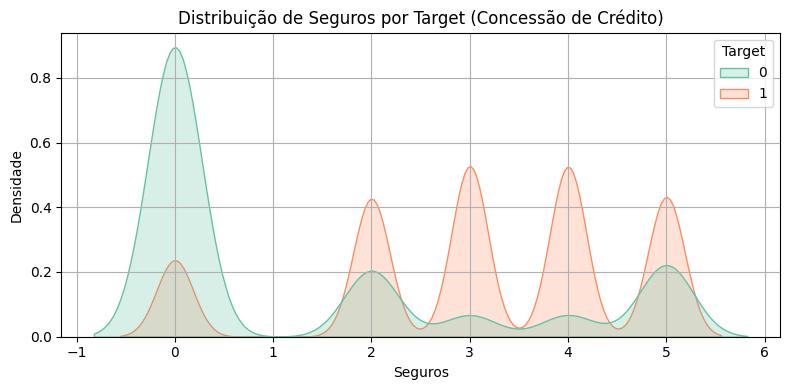

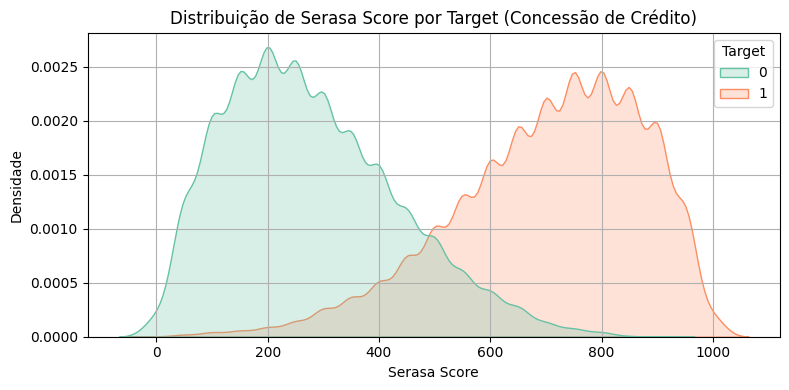

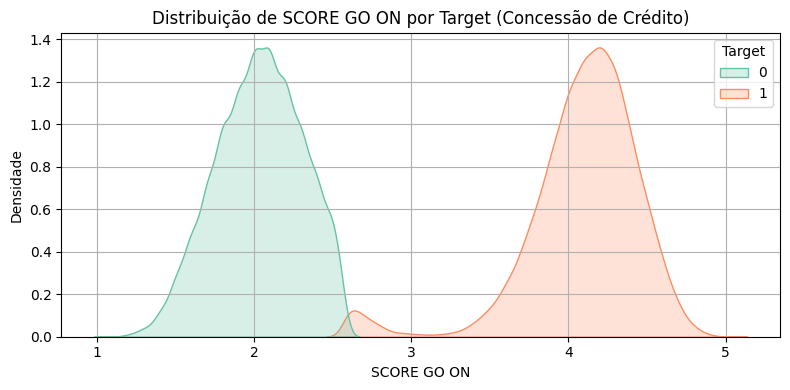

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

indicadores = [ 'Margem EBITDA', 'Divida liquida/EBTIDA', 'Indice de liquidez',
               'Ciclo Financeiro', 'Conversao Ebitda em FCO', 'Tempo de atuação em anos','Auditorias','PEFIN', 'Garantia', 'Seguros', 'Serasa Score',
               'SCORE GO ON']

for col in indicadores:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='Target', fill=True, common_norm=False, palette='Set2')
    plt.title(f'Distribuição de {col} por Target (Concessão de Crédito)')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Notas vs Indicadores

In [31]:
notas_vs_indicadores = {
    'nota_i1': 'Margem EBITDA',
    'nota_i2': 'Divida liquida/EBTIDA',
    'nota_i3': 'Indice de liquidez',
    'nota_i4': 'Ciclo Financeiro',
    'nota_i5': 'Conversao Ebitda em FCO',
    'nota_i6': 'Tempo de atuação em anos',
    'nota_i7': 'Auditorias',
    'nota_i8': 'PEFIN',
    'nota_i9': 'Garantia',
    'nota_i10': 'Seguros',
    'nota_i11': 'Serasa Score'
}

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


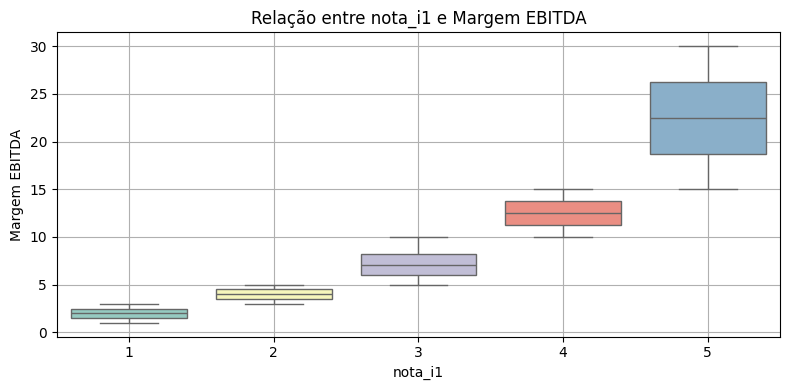

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


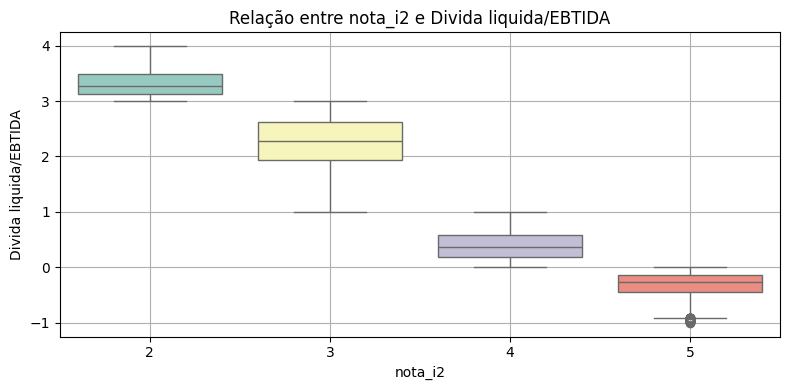

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


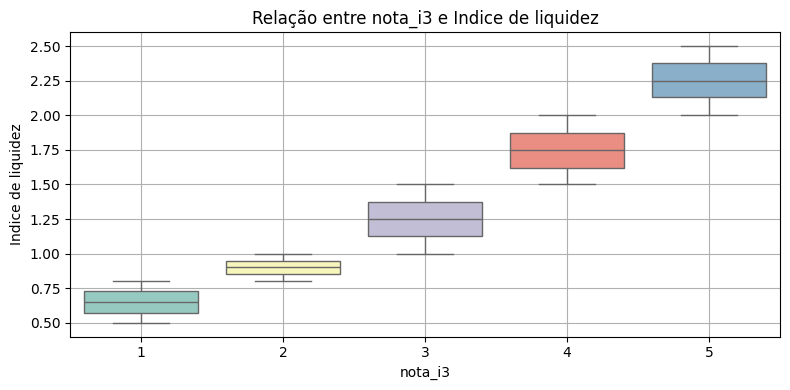

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


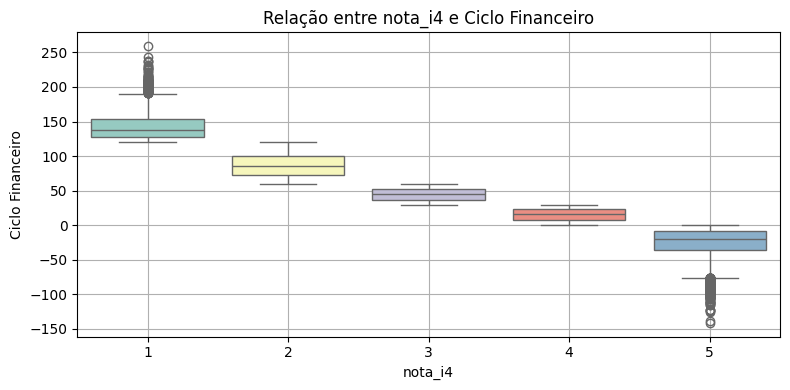

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


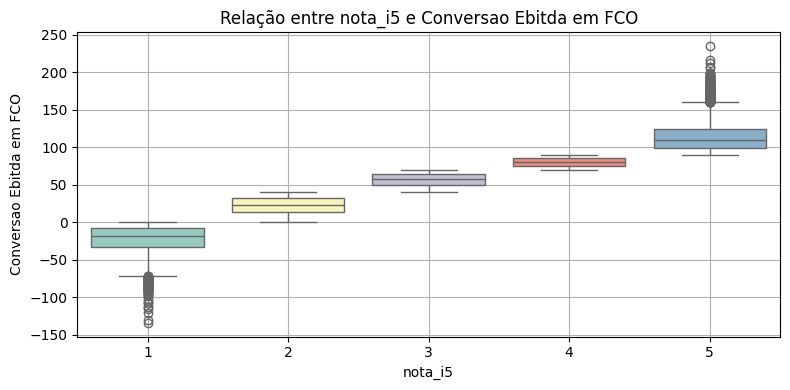

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


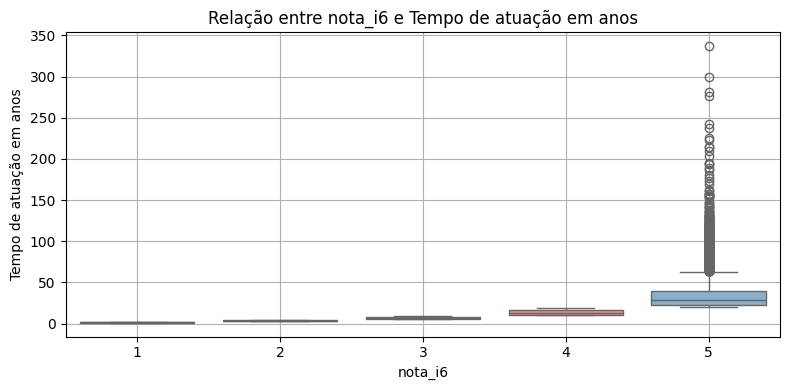

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


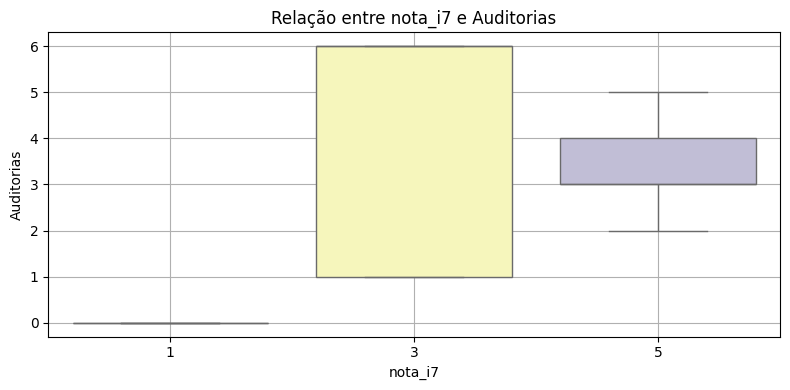

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


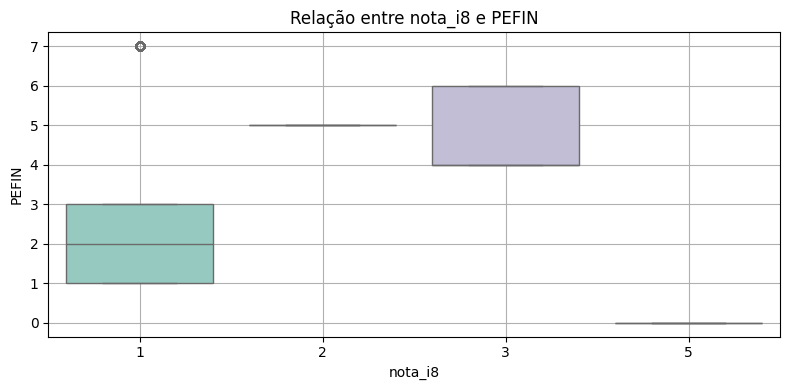

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


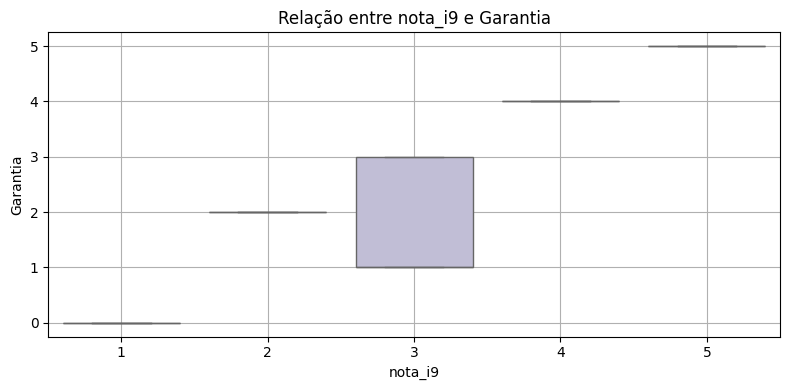

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


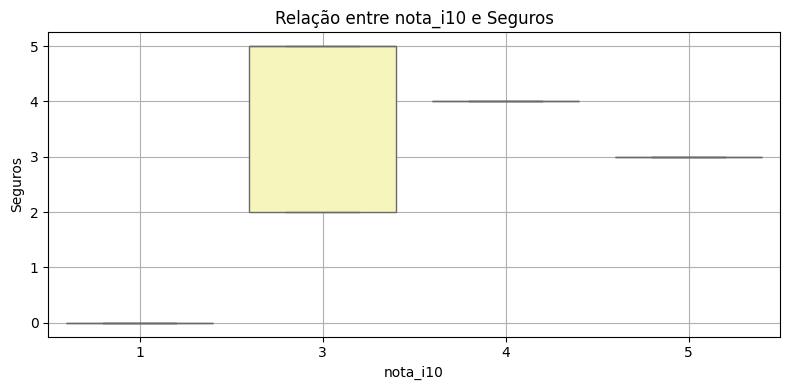

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


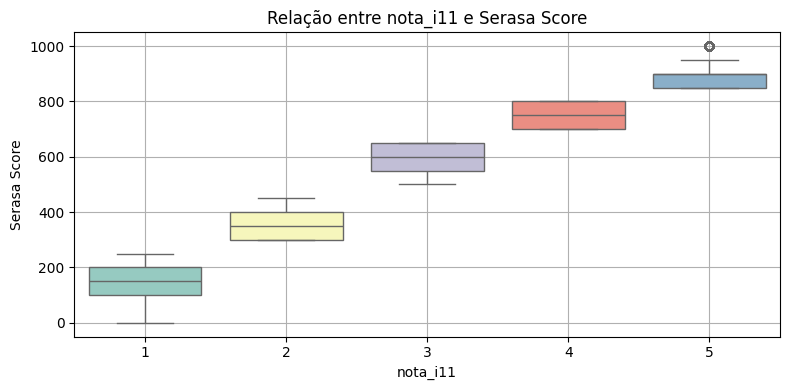

In [32]:
for nota, indicador in notas_vs_indicadores.items():
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')
    plt.title(f'Relação entre {nota} e {indicador}')
    plt.xlabel(nota)
    plt.ylabel(indicador)
    plt.grid(True)
    plt.tight_layout()
    plt.show()